# General analysis of Mall Customer Segmentation

Our aim is to exercise the fresh acquired knowledge regarding the usage of the Seaborn, Pandas, Numpy and Matplotlib libraries, aswell as the Jupyter Notebook tools, while explaining the analysis step by step.

The dataset comprises of the following information:

1. Customer ID 
2. Gender 
3. Age 
4. Annual Income (k$)
5. Spending Score - Assigned by the mall, based on behavior and spending nature

Some of the questions we might answer:

1. What age is higher in density when it comes to customers?
2. What sex is higher in density to the customer population?
3. What relation does the spending score has to the customer's age?
4. Is there a relation between the Spending Score and the Annual Income?

Let us start by importing the packages needed for the analysis:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] # Defining the standard figure size
import seaborn as sns
import os

Now, importing the CSV document:

In [20]:
file = pd.read_csv('../input/Mall_Customers.csv')

Checking if the document was uploaded correctly and taking a look at how it is shown:

In [21]:
file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Raw data analysis

Now, as the data was uploaded correctly, let us first take a look at the type of data this dataframe has:

In [22]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We can see that the numbers are all integers, and that only the column 'Gender' uses an object. 

Now, checking if there are null spaces in the dataframe:

In [23]:
file.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

There are no null data, thus there is no need to drop any of the columns as all of them comprises of information that we are going to use.

Now, let us check the min and max values for the column Age:

In [24]:
file['Age'].min()

18

In [25]:
file['Age'].max()

70

We can see that the data is related to legal aged customers, up to people at the age of 70.

Let us take a look at how the header is shown:

In [26]:
file.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Renaming the columns CustomerID and Annual Income for easier navigation:

In [27]:
file.rename(columns={'CustomerID':'ID','Annual Income (k$)':'Annual Income','Genre':'Gender'}, inplace=True)

In [28]:
file.describe()

,ID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Answering the questions

### 1. What age is higher in density when it comes to customers?

First, we can create a plot based on the Age column, separated by the number of times an Age occurs:

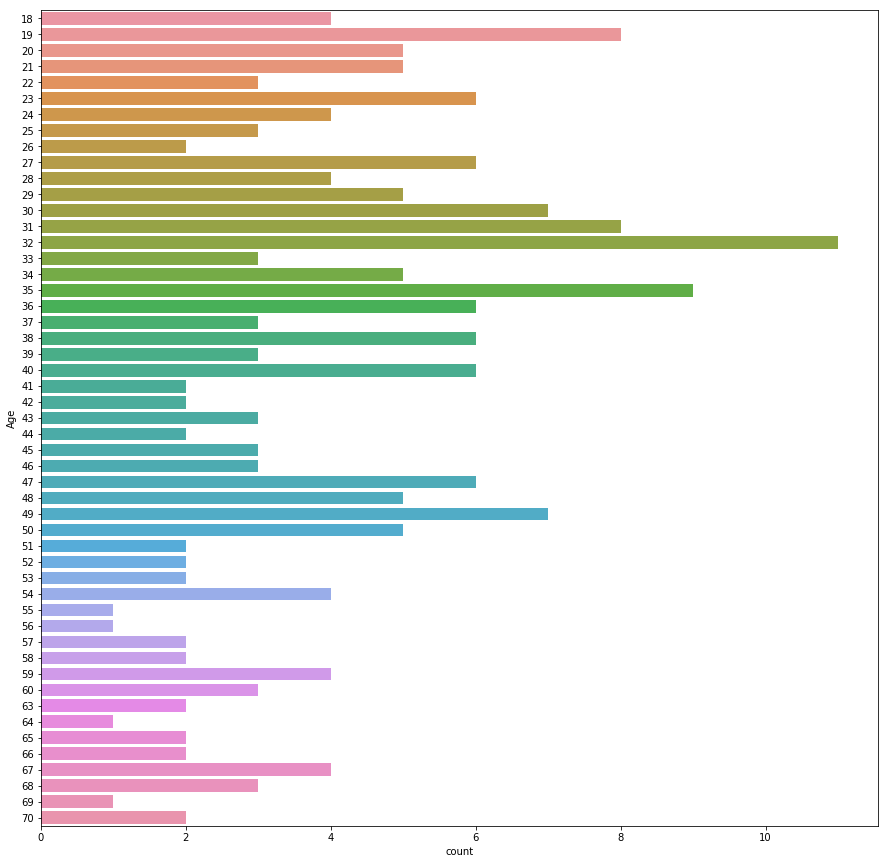

<Figure size 1440x1440 with 0 Axes>

In [29]:
sns.countplot(y='Age', data=file)
plt.figure(figsize=(20,20))
plt.show()

This doesn't seem objective: the list is not in a crescent order and there is too much information in the y axis, showing a polluted plot. The data must be easy to read and interpret, and for such, we must work on another way to answer this question.

We will now isolate both columns Age and ID and group the number of occurrences by Age, while making a calculation to show them each 10 years:

In [30]:
file_ages = file[['ID','Age']]
file_ages.head()

,ID,Age
0,1,19
1,2,21
2,3,20
3,4,23
4,5,31


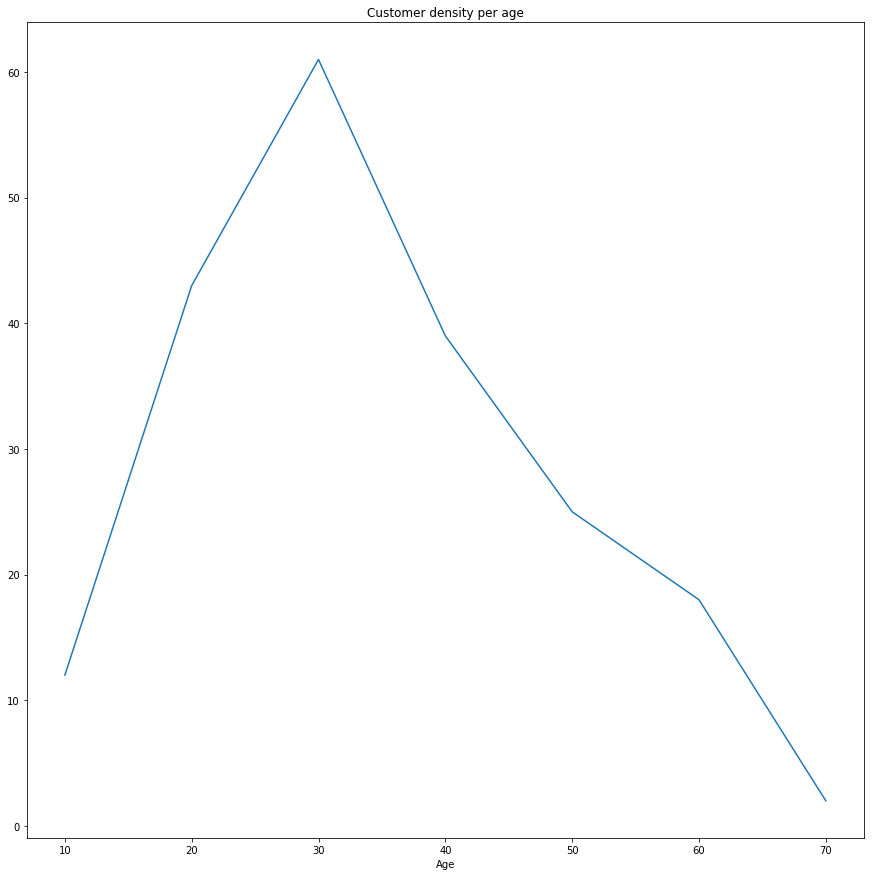

Age
10    12
20    43
30    61
40    39
50    25
60    18
70     2
Name: ID, dtype: int64


In [31]:
age = file_ages.groupby((file_ages.Age//10*10))['ID'].count()
plt.title('Customer density per age')
age.plot()
plt.show()
print(age)

Now the plot shows the data in a better fashion. We can clearly see that the ages between 20 and 40 have a higher density when it comes to customers, and that the higher the age, the lower the density of people in the mall.

Now, into the second question:

### 2. What sex is higher in density to the customer population?

This question is easily answered by showing a simple plot, which counts the unique number of entries for each Gender within the dataframe:

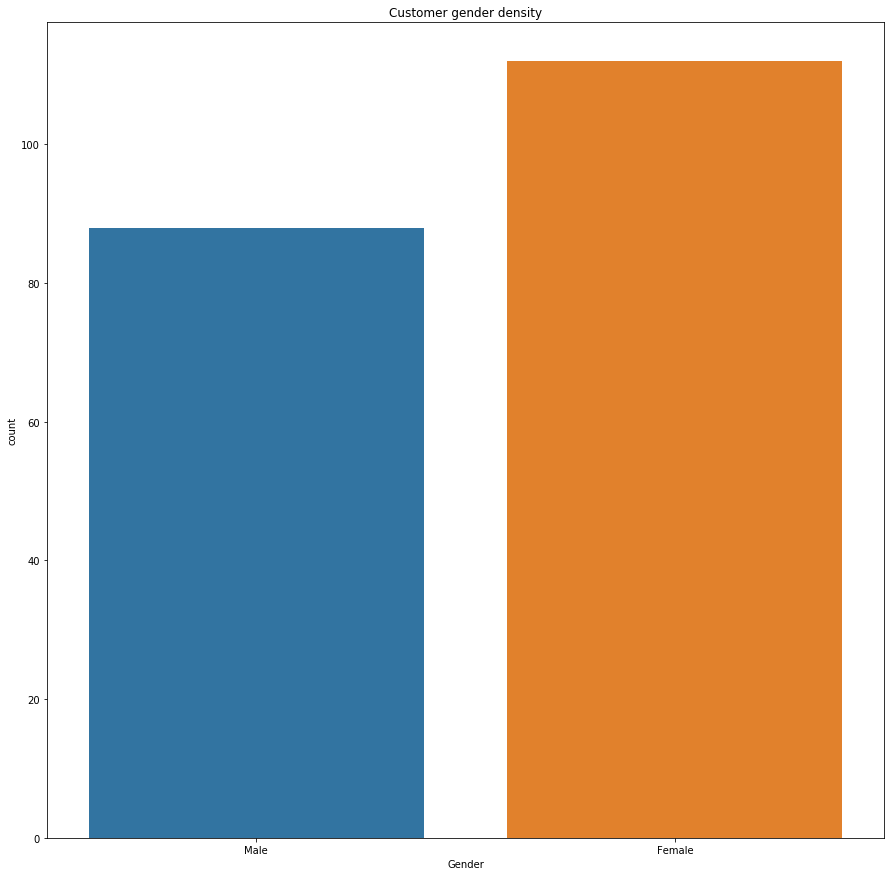

Gender
Female    112
Male       88
Name: ID, dtype: int64


In [32]:
sns.countplot(x='Gender', data=file)
plt.title('Customer gender density')
plt.show()
print(file.groupby(['Gender'])['ID'].count())

We can see that the plot shows the density correctly.

### 3. What relation does the spending score has to the customer's age?

To answer this question, we will create a plot showing the distribution of Spending Score by Age, colored by Gender.

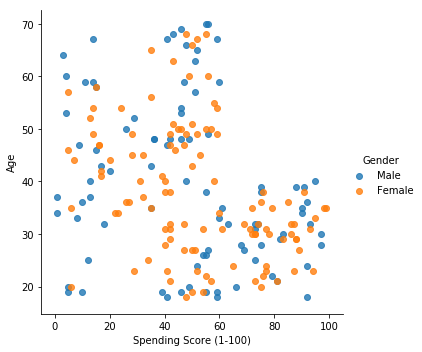

In [33]:
sns.lmplot(x='Spending Score (1-100)', 
           y='Age', data=file, 
           fit_reg=False, 
           hue='Gender')

The plot shows that young and middle aged customers tend to have a higher Spending Score, while older customers tend to have a mid to lower Spending Score.

It is possible to show the plot with more details, separating them by Gender in two plots:

(-1, 100)

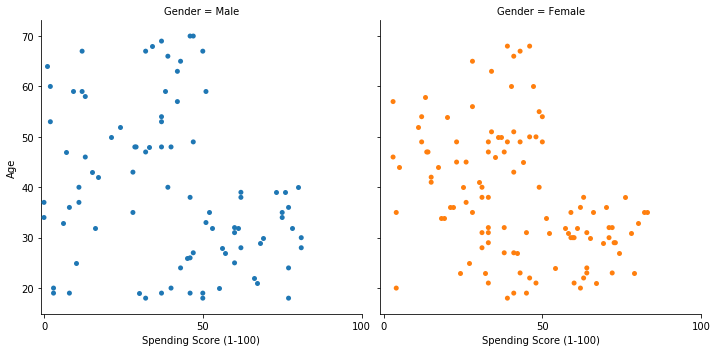

In [34]:
sns.catplot(x='Spending Score (1-100)', 
            y='Age', 
            data=file, 
            col='Gender', 
            kind='swarm',
            hue='Gender')
x_axis = [0,50,100]
x_lab = ['0','50','100']
plt.xticks(x_axis,x_lab)
plt.xlim(-1, 100)

### 4. Is there a relation between the Spending Score and the Annual Income?

We can create two plots, separated by gender, to better view the distribution of this correlation:

<Figure size 1080x1080 with 0 Axes>

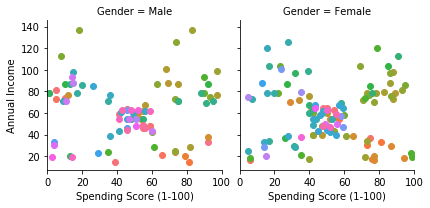

<Figure size 1080x1080 with 0 Axes>

In [35]:
s = sns.FacetGrid(file, col='Gender', hue='Age')
s.map(plt.scatter, 'Spending Score (1-100)','Annual Income')
plt.xlim(0, 100)
plt.figure(figsize=(15, 15))

Although these plots are showing the information requested, we can try to plot these in a better fashion, organizing the colors per decade and granting more insight:

(-1, 100)

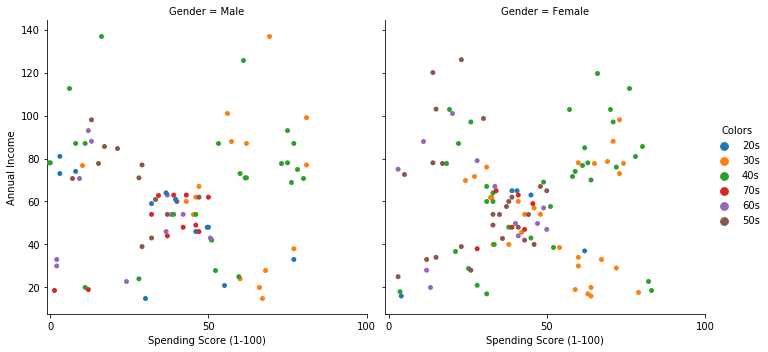

In [36]:
# Setting up colors to represent the decades in the plot
conditions = [
    (file['Age'] > 0) & (file['Age'] <= 20),
    (file['Age'] > 20) & (file['Age'] <= 30),
    (file['Age'] > 30) & (file['Age'] <= 40),
    (file['Age'] > 40) & (file['Age'] <= 50),
    (file['Age'] > 50) & (file['Age'] <= 60),
    (file['Age'] > 60)]
choices = ['20s', '30s', '40s', '50s', '60s', '70s']
file['Colors'] = np.select(conditions, choices, default='black')

sns.catplot(x='Spending Score (1-100)', 
            y='Annual Income', 
            data=file, 
            col='Gender', 
            kind='swarm',
            hue='Colors')
x_axis = [0,50,100]
x_lab = ['0','50','100']
plt.xticks(x_axis,x_lab)
plt.xlim(-1, 100)

### Conclusion

From this analysis, we can conclude that:

1. Most of the customer population is comprised by middle aged people, and the older the population gets, the less they tend to go to the mall.
2. There is a considerable difference to the men/women rate. Women comprises the largest part of the population of customers.
3. By considering the Spending Score set by the mall, we can see that younger and middle aged people tend to buy more, while older people does so less frequently. 
4. It is possible to note that there is a cluter of occurrences, in both genders, when it comes to Annual Income and Spending Score, which means that the average Spending Score is related to the income of 40k to 70k. 



This was my first Kernel ever. The objective here was to exercise the content learned recently regarding data science and the libraries within Python. Although the plots were simple, they took me a long time to make, and I learned a lot from the mistakes and insights.

Any feedback is welcome, always!

